<a href="https://colab.research.google.com/github/mnocerino23/MLB-Salary-Regressions/blob/main/positionplayers_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this file, I read in two different datasets that we will utilize in this project. The first, which I read into the dataframe mlb_salaries, contains every MLB player and their salary from the 2019 Major League Baseball season. The second, which I read into the stats Pandas dataframe, contains every players(position players -excluding pitchers) individual stats from the 2019 season.

In [1192]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
mlb_salaries = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/mlbSalaries.csv')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/mlb2019stats.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Taking a look at the mlb salaries dataset and its features:

In [1193]:
mlb_salaries.head()

,year,team,name,salary,playerID
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666,500871
1,2019,arizona-diamondbacks,Robbie Ray,6050000,592662
2,2019,arizona-diamondbacks,Taijuan Walker,5025000,592836
3,2019,arizona-diamondbacks,Jake Lamb,4825000,571875
4,2019,arizona-diamondbacks,Adam Jones,4500000,430945


In [1194]:
#Look at the different features contained in the stats dataframe
print(stats.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'bats', 'throws', 'age', 'year',
       'stints', 'teamID', 'lg', 'G', 'tap', 'AB', 'R', 'H', 'db', 'tr', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'hbp', 'SH', 'SF', 'GIDP', 'avg',
       'obp', 'slg', 'woba', 'PRO', 'GURU', 'ROTO', 'pos1', 'g1', 'pos2', 'g2',
       'pos3', 'g3', 'pos4', 'g4', 'pos5', 'g5', 'mlbam_id',
       ' baseball_prospectus_id ', 'n2019'],
      dtype='object')


In [1195]:
#Drop unwanted features from stats using their indices

dropped_cols = [0,34,36,38,39,40,41,42,43,44,45,46,47]
stats.drop(stats.columns[dropped_cols],axis=1,inplace=True)
print(stats.columns)

Index(['nameFirst', 'nameLast', 'bats', 'throws', 'age', 'year', 'stints',
       'teamID', 'lg', 'G', 'tap', 'AB', 'R', 'H', 'db', 'tr', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'hbp', 'SH', 'SF', 'GIDP', 'avg', 'obp',
       'slg', 'woba', 'PRO', 'GURU', 'pos1', 'pos2'],
      dtype='object')


In [1196]:
stats.head()

,nameFirst,nameLast,bats,throws,age,year,stints,teamID,lg,G,...,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1,pos2
0,Jose,Abreu,R,R,32,2019,1,CHA,AL,159.0,...,10.0,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B,NaN
1,Ronald,Acuna,R,R,21,2019,1,ATL,NL,156.0,...,1.0,8.0,0.279553,0.365169,0.517572,0.380365,270.82,104.352687,OF,NaN
2,Cristhian,Adames,B,R,27,2019,1,SFN,NL,10.0,...,0.0,0.0,0.318182,0.375000,0.363636,0.336667,8.08,7.644153,2B,3B
3,Willy,Adames,R,R,23,2019,1,TBA,AL,152.0,...,1.0,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS,NaN
4,Matt,Adams,L,R,30,2019,1,WAS,NL,111.0,...,1.0,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B,NaN


In [1197]:
#create a feature with player first and last name instead of having two columns with this information

for index, rows in stats.iterrows():
  stats.at[index,'nameFirst'] += ' ' + stats.at[index, 'nameLast']
stats.drop(stats.columns[1], axis = 1, inplace = True)
stats.rename(columns = {'nameFirst':'name'}, inplace = True)
stats.head()

,name,bats,throws,age,year,stints,teamID,lg,G,tap,...,SF,GIDP,avg,obp,slg,woba,PRO,GURU,pos1,pos2
0,Jose Abreu,R,R,32,2019,1,CHA,AL,159.0,693.0,...,10.0,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B,NaN
1,Ronald Acuna,R,R,21,2019,1,ATL,NL,156.0,712.0,...,1.0,8.0,0.279553,0.365169,0.517572,0.380365,270.82,104.352687,OF,NaN
2,Cristhian Adames,B,R,27,2019,1,SFN,NL,10.0,24.0,...,0.0,0.0,0.318182,0.375000,0.363636,0.336667,8.08,7.644153,2B,3B
3,Willy Adames,R,R,23,2019,1,TBA,AL,152.0,584.0,...,1.0,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS,NaN
4,Matt Adams,L,R,30,2019,1,WAS,NL,111.0,333.0,...,1.0,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B,NaN


In [1198]:
#restrict salaries dataframe to those from the 2019 season
twentynineteen_salaries = mlb_salaries.loc[mlb_salaries['year'] == 2019]
twentynineteen_salaries.shape
twentynineteen_salaries.tail(7)

,year,team,name,salary,playerID
2281,2019,washington-nationals,Victor Robles,557800,645302
2282,2019,washington-nationals,Javy Guerra,554829,457915
2283,2019,washington-nationals,Daniel Hudson,491965,543339
2284,2019,washington-nationals,Gerardo Parra,429696,467827
2285,2019,washington-nationals,Hunter Strickland,419355,519326
2286,2019,washington-nationals,Tanner Rainey,402840,663432
2287,2019,washington-nationals,Erick Fedde,355096,607200


In [1199]:
twentynineteen_salaries = twentynineteen_salaries.drop(columns = ['playerID'], axis = 1)
twentynineteen_salaries.head()

,year,team,name,salary
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666
1,2019,arizona-diamondbacks,Robbie Ray,6050000
2,2019,arizona-diamondbacks,Taijuan Walker,5025000
3,2019,arizona-diamondbacks,Jake Lamb,4825000
4,2019,arizona-diamondbacks,Adam Jones,4500000


#Use the describe function to analyze distribution of position player salaries in 2019

In [1200]:
twentynineteen_salaries.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,780.0,2.019000e+03,0.000000e+00,2019.0,2019.0,2019.0,2019.00,2019.0
salary,780.0,3.810316e+06,5.926767e+06,143232.0,474122.0,605100.0,4509408.75,37505562.0


# Look at the shape of both the stats and salaries dataframes

In [1201]:
print('Stats Dataframe Shape: ', stats.shape)
print('2019 Salaries Dataframe Shape: ', twentynineteen_salaries.shape)

Stats Dataframe Shape:  (635, 34)
2019 Salaries Dataframe Shape:  (780, 4)


As we can see from the different shapes above, the 2019 salaries dataset is larger which implys that there are players in the salaries dataset (probably players who played few games) that do not appear in the stats dataset.

Note: the MLB salaries dataframe contains all pitchers in addition to position players compared to the stats dataset which only has position players stats. This helps explain why the 2019 salaries has more entries.

In [1202]:
#get a list of last names for which we have a 2019 salary for. This way, we can
#drop rows in stats that don't have a salary for 2019 (many will be 
#dropped due to being new players that started post 2019 or a few in which salary is missing)
last_names = []
for item in list(twentynineteen_salaries['name']):
  name = item.split()
  if len(name) >= 2:
    last_names.append(name[1])
  else:
    last_names.append(name[0])

In [1203]:
#remove entries in stats for which we do not have the salaries for the 2019 season
dropped_players = []
for index, row in stats.iterrows():
  full_name = stats.at[index,'name']
  player_name = full_name.split()
  if player_name[1] not in last_names:
    dropped_players.append(full_name)
    #drops the entries from the stats dataframe
    stats.drop(labels = index, axis = 0, inplace = True)

In [1204]:
#list of players that were dropped due to missing salary or being a young player not yet in the league
print(list(dropped_players))

['Jim Adduci', 'Jesus Aguilar', 'Anthony Alford', 'Aaron Altherr', 'Miguel Andujar', 'Aristides Aquino', 'Randy Arozarena', 'Christian Arroyo', 'Tyler Austin', 'Abiatal Avelino', 'Steven Baron', 'Franklin Barreto', 'Tres Barrera', 'Anthony Bemboom', 'Gregory Bird', 'Skye Bolt', 'Jorge Bonifacio', 'Peter Bourjos', 'Rob Brantly', 'Socrates Brito', 'Michael Brosseau', 'Seth Brown', 'Drew Butera', 'Byron Buxton', 'Johan Camargo', 'Jeimer Candelario', 'Juan Centeno', 'Francisco Cervelli', 'Yu Chang', 'Michael Chavis', 'Ji-Man Choi', 'Shin-Soo Choo', 'Nick Ciuffo', 'Zack Collins', 'Christian Colon', 'Ryan Court', 'Kaleb Cowart', 'Zack Cozart', 'Dylan Cozens', 'Noel Cuevas', 'Charlie Culberson', "Travis d'Arnaud", 'Yonathan Daza', 'Nicky Delmonico', 'Wilmer Difo', 'Nick Dini', 'Mauricio Dubon', 'Lucas Duda', 'Steven Duggar', 'Tommy Edman', 'Jacob Elmore', 'Thairo Estrada', 'Derek Fisher', 'Mike Ford', 'Jake Fraley', 'Ty France', 'David Freitas', 'Josh Fuentes', 'Rocky Gale', 'Isaac Galloway',

Note: the block of code above causes us to drop around 200 rows from the stats dataframe. 

In [1205]:
stats.shape

(434, 34)

In [1206]:
#create a dictionary mapping player to their salary in 2019
player_salaries = {}
for index,row in twentynineteen_salaries.iterrows():
  player_salaries[twentynineteen_salaries.at[index,'name']] = twentynineteen_salaries.at[index,'salary']

In [1207]:
print(player_salaries)

{'Eduardo Escobar': 6166666, 'Robbie Ray': 6050000, 'Taijuan Walker': 5025000, 'Jake Lamb': 4825000, 'Adam Jones': 4500000, 'Alex Avila': 4250000, 'Jarrod Dyson': 4000000, 'Wilmer Flores': 3750000, 'Nick Ahmed': 3662500, 'Yoshihisa Hirano': 3500000, 'Mike Leake': 3000000, 'Merrill Kelly': 2000000, 'Ketel Marte': 2000000, 'Andrew Chafin': 1945000, 'Archie Bradley': 1830000, 'McFarland': 1400000, 'Matt Andriese': 920000, 'Luke Weaver': 581300, 'Carson Kelly': 560000, 'Christian Walker': 559800, 'Yoan Lopez': 556900, 'Caleb Joseph': 473120, 'Ildemaro Vargas': 420744, 'Tim Locastro': 375984, 'Taylor Clarke': 355096, 'Jon Duplantier': 283480, 'Josh Donaldson': 23000000, 'Freddie Freeman': 21409375, 'Dallas Keuchel': 13000000, 'Julio Teheran': 11166668, 'Darren O': 9000000, 'Day': 5475000, 'Mike Foltynewicz': 4591409, 'Mark Melancon': 4000000, 'Tyler Flowers': 4000000, 'Nick Markakis': 3720463, 'Anthony Swarzak': 2875000, 'Adam Duvall': 2000000, 'Brian McCann': 1311805, 'Shane Greene': 12178

In [1208]:
stats['salary'] = ''
#manually enter a few values that are causing issues due to naming inconsistencies between the two datasets

In [1209]:
#add on salaries for the position players
for index, row in stats.iterrows():
  if stats.at[index,'name'] in list(player_salaries.keys()):
    stats.at[index,'salary'] = player_salaries[stats.at[index,'name']]
  else:
    stats.at[index,'salary'] = None

We will be dropping the pos2 feature shortly but we will create a new feature
to store this information called multiple_positions. If the value for position 2 is not null (the player plays multiple positions), we will add a 1 and if the pos2 feature is null we add in a 0.

In [1210]:
stats['multiple_positions'] = ''
for index, row in stats.iterrows():
  #NaN has type float in python so we can use this if statement to find all null values for pos2
  if type(stats.at[index, 'pos2']) == float:
    stats.at[index, 'multiple_positions'] = 0
  else:
    stats.at[index,'multiple_positions'] = 1

In [1211]:
#Drop the old position 2 feature
stats = stats.drop(columns = ['pos2'], axis = 1)

In [1212]:
#observe how salary has 84 nulls values. We will drop these in the next cell.
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 634
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                434 non-null    object 
 1   bats                434 non-null    object 
 2   throws              433 non-null    object 
 3   age                 434 non-null    int64  
 4   year                434 non-null    int64  
 5   stints              434 non-null    int64  
 6   teamID              434 non-null    object 
 7   lg                  434 non-null    object 
 8   G                   433 non-null    float64
 9   tap                 433 non-null    float64
 10  AB                  433 non-null    float64
 11  R                   433 non-null    float64
 12  H                   433 non-null    float64
 13  db                  433 non-null    float64
 14  tr                  433 non-null    float64
 15  HR                  433 non-null    float64
 16  RBI     

In [1213]:
#drop entries that have a value of None for salary. We lose a few more players in doing this.
for index, row in stats.iterrows():
  if stats.at[index, 'salary'] == None:
    stats.drop(labels = index, axis = 0, inplace = True)
stats.shape

(350, 35)

In [1214]:
#convert 2019 salary column to millions
for index,row in stats.iterrows():
  stats.at[index,'salary'] = stats.at[index, 'salary']/1000000
stats.head()

,name,bats,throws,age,year,stints,teamID,lg,G,tap,...,GIDP,avg,obp,slg,woba,PRO,GURU,pos1,salary,multiple_positions
0,Jose Abreu,R,R,32,2019,1,CHA,AL,159.0,693.0,...,24.0,0.283912,0.330447,0.503155,0.354834,245.90,79.642904,1B,16.015,0
3,Willy Adames,R,R,23,2019,1,TBA,AL,152.0,584.0,...,9.0,0.254237,0.316695,0.418079,0.320257,187.03,49.147818,SS,0.5624,0
4,Matt Adams,L,R,30,2019,1,WAS,NL,111.0,333.0,...,7.0,0.225806,0.276276,0.464516,0.314294,104.66,32.037226,1B,3.0,0
6,Ehire Adrianza,B,R,29,2019,1,MIN,AL,83.0,234.0,...,2.0,0.272277,0.349138,0.415842,0.334829,78.35,32.184009,3B,1.3,1
8,Nick Ahmed,R,R,29,2019,1,ARI,NL,158.0,625.0,...,15.0,0.253597,0.315705,0.437050,0.323952,202.47,53.517840,SS,3.6625,0


In [1215]:
#Add column for OPS - which is a key metric that represents on base percentage + slugging percentage
stats['ops'] = ""
for index,row in stats.iterrows():
  stats.at[index,'ops'] = stats.at[index, 'obp'] + stats.at[index, 'slg']

In [1216]:
#Bring in one final dataset to get a key metric WAR (wins above replacement) from the 2019 season
war = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/FanGraphs_Leaderboard.csv')
war.head()

,Name,playerid,Team,Pos,PA,IP,Primary WAR,Total WAR
0,Mike Trout,10155,Angels,CF,600.0,NaN,8.294552,8.3
1,Alex Bregman,17678,Astros,3B/SS,690.0,NaN,8.148545,8.1
2,Cody Bellinger,15998,Dodgers,RF,660.0,NaN,7.696912,7.7
3,Jacob deGrom,10954,Mets,P,NaN,204.0,6.935872,7.6
4,Gerrit Cole,13125,Astros,P,NaN,212.1,7.469904,7.4


Now, we will add on an important metric, Wins Above Replacement to all players in our dataset

In [1217]:
#Before mapping names between the datasets we must get rid of any
#inconsistencies in the naming (remove Jr. and Sr. suffixes from both)
import re
for index,rows in stats.iterrows():
  if re.search('Jr.|Sr.',stats.at[index,'name']):
    stats.at[index,'name'] = stats.at[index,'name'][0:-4]
for index, rows in war.iterrows():
  if re.search('Jr.|Sr.',war.at[index,'Name']):
    war.at[index,'Name'] = war.at[index,'Name'][0:-4]

#Alleviate one more issue with a last name inconsistency
war.at[526,'Name'] = 'Dee Gordon'

#Alleviate first name issues: Write every player as the first two letters of their first name
#and then there last name to alleviate inconsistencies in nicknames between datasets
#For example some payers are referred to by nickname in war and full name in the 2019 stats dataframes
#This code will alleviate this issue and allow us to connect the two datasets via name
for index, rows in war.iterrows():
  name_split = war.at[index,'Name'].split()
  if re.match('[A-Z]\.', name_split[1]):
    #print(name_split)
    name_split[1] = name_split[2]
  war.at[index,'Name'] = name_split[0][0:2] + ' ' + name_split[1]
  #print(war.at[index,'Name'])
for index, rows in stats.iterrows():
  name_split = stats.at[index,'name'].split()
  if re.match('[A-Z]\.', name_split[1]):
    name_split[1] = name_split[2]
  stats.at[index,'name'] = name_split[0][0:2] + ' ' + name_split[1]
  #print(stats.at[index,'name'])

In [1218]:
#Create a dictionary mapping each player to their WAR score
#add this as a column to the stats dataframe
players_war = {}
stats['WAR'] = ''
for index, rows in war.iterrows():
  players_war[war.at[index,'Name']] = war.at[index, 'Total WAR']
for index, rows in stats.iterrows():
  stats.at[index,'WAR'] = players_war[stats.at[index,'name']]

In [1219]:
stats.head()

,name,bats,throws,age,year,stints,teamID,lg,G,tap,...,obp,slg,woba,PRO,GURU,pos1,salary,multiple_positions,ops,WAR
0,Jo Abreu,R,R,32,2019,1,CHA,AL,159.0,693.0,...,0.330447,0.503155,0.354834,245.90,79.642904,1B,16.015,0,0.833602,1.6
3,Wi Adames,R,R,23,2019,1,TBA,AL,152.0,584.0,...,0.316695,0.418079,0.320257,187.03,49.147818,SS,0.5624,0,0.734774,3.3
4,Ma Adams,L,R,30,2019,1,WAS,NL,111.0,333.0,...,0.276276,0.464516,0.314294,104.66,32.037226,1B,3.0,0,0.740792,-0.2
6,Eh Adrianza,B,R,29,2019,1,MIN,AL,83.0,234.0,...,0.349138,0.415842,0.334829,78.35,32.184009,3B,1.3,1,0.76498,0.7
8,Ni Ahmed,R,R,29,2019,1,ARI,NL,158.0,625.0,...,0.315705,0.437050,0.323952,202.47,53.517840,SS,3.6625,0,0.752755,3.3


In [1220]:
stats.shape

(350, 37)

In [1221]:
#Was having issues working with the data from the following columns so we use pd.to_numeric to fix this.
need_to_change = ['salary', 'ops', 'WAR']
for item in need_to_change:
  stats[item] = pd.to_numeric(stats[item])

# Look at the breakdown of different stats for position players in our dataset

In [1222]:
stats.describe()

,age,year,stints,G,tap,AB,R,H,db,tr,...,GIDP,avg,obp,slg,woba,PRO,GURU,salary,ops,WAR
count,350.000000,350.0,350.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,350.000000,349.000000,350.000000
mean,28.105714,2019.0,1.045714,107.727794,399.495702,356.810888,51.997135,92.707736,18.839542,1.676218,...,7.524355,0.249231,0.320210,0.426594,0.325207,135.612264,47.949604,4.459409,0.746804,1.435429
std,3.672514,0.0,0.234970,38.540140,186.356022,165.544847,30.031162,49.180356,11.062910,1.993101,...,5.025522,0.042477,0.045093,0.094666,0.051829,72.613256,32.996020,6.223266,0.132551,1.927512
min,20.000000,2019.0,1.000000,7.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071429,0.000000,0.051429,0.720000,0.005798,0.143232,0.071429,-2.100000
25%,25.000000,2019.0,1.000000,82.000000,247.000000,223.000000,29.000000,52.000000,10.000000,0.000000,...,4.000000,0.227451,0.297030,0.378378,0.299286,77.000000,24.462459,0.527236,0.680556,-0.100000
50%,27.500000,2019.0,1.000000,116.000000,411.000000,370.000000,47.000000,92.000000,18.000000,1.000000,...,7.000000,0.253863,0.323529,0.422442,0.327131,130.610000,41.678971,1.131250,0.747728,1.000000
75%,30.750000,2019.0,1.000000,140.000000,550.000000,493.000000,75.000000,133.000000,27.000000,3.000000,...,11.000000,0.275801,0.347945,0.491525,0.358137,191.420000,62.650646,5.723521,0.833602,2.375000
max,40.000000,2019.0,3.000000,162.000000,747.000000,681.000000,135.000000,206.000000,58.000000,10.000000,...,24.000000,0.344311,0.438333,0.670757,0.459552,296.980000,182.170007,30.000000,1.100067,8.300000


In [1223]:
#Use the groupby function to visualize which positions are payed the highest salaries
#The results reveal that designated hitters, first baseman, and third baseman make the most on average.
stats.groupby(['pos1']).mean().sort_values('salary', ascending = False)

,age,year,stints,G,tap,AB,R,H,db,tr,...,GIDP,avg,obp,slg,woba,PRO,GURU,salary,ops,WAR
pos1,,,,,,,,,,,,,,,,,,,,,
DH,31.000000,2019.0,1.000000,78.000000,327.200000,294.400000,46.800000,85.200000,17.800000,1.400000,...,7.000000,0.210745,0.284256,0.387646,0.294102,124.438000,56.497346,8.940000,0.671902,2.300000
1B,30.085106,2019.0,1.042553,115.425532,434.021277,381.957447,55.702128,98.042553,20.319149,0.936170,...,9.553191,0.251906,0.330957,0.450848,0.339628,151.276809,55.456892,7.160328,0.781805,1.008511
3B,27.897436,2019.0,1.051282,117.974359,453.076923,400.000000,61.410256,106.256410,21.641026,2.000000,...,8.820513,0.255774,0.336202,0.454416,0.343333,161.252564,61.478658,5.831986,0.790618,2.341026
SS,26.323529,2019.0,1.029412,115.705882,468.647059,427.794118,62.500000,116.529412,24.294118,2.352941,...,9.147059,0.264871,0.318860,0.427549,0.323955,157.599118,51.224828,4.115874,0.746409,2.226471
OF,27.471074,2019.0,1.074380,112.644628,414.479339,370.280992,56.256198,96.247934,20.008264,2.157025,...,7.000000,0.249581,0.320123,0.429485,0.325895,141.040909,50.330804,4.093046,0.749608,1.426446
2B,27.904762,2019.0,1.000000,109.357143,391.547619,352.857143,49.404762,92.476190,17.738095,2.119048,...,6.476190,0.256391,0.324055,0.414314,0.323291,129.103810,41.821918,3.651804,0.738369,1.238095
C,28.950820,2019.0,1.032787,82.360656,281.770492,251.377049,31.032787,60.409836,11.393443,0.426230,...,6.032787,0.231799,0.302930,0.395499,0.305710,89.523770,30.485108,2.671829,0.698429,0.854098
P,23.000000,2019.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554829,NaN,-0.200000


In [1224]:
stats['count'] = 1
#Investigate the handidness of batters in the MLB by position
#B = switch hitter
#L = left handed hitter
#R = right handed hitter
stats.groupby(['pos1','bats']).count()['count']

pos1  bats
1B    B        4
      L       20
      R       23
2B    B        7
      L       17
      R       18
3B    B        4
      L       11
      R       24
C     B        7
      L       10
      R       44
DH    B        2
      L        1
      R        2
OF    B       12
      L       47
      R       62
P     L        1
SS    B        4
      L        3
      R       27
Name: count, dtype: int64

In [1225]:
#Investigate the distribution of handedness in the MLB at various positions
#L refers to left hand throwing and R refers to throwing with the right hand.

#as we can see the only acceptable positions for lefty throwers (besides pitcher) are 1B and Outfield.
stats.groupby(['pos1','throws']).count()['count']

pos1  throws
1B    L          9
      R         38
2B    R         42
3B    R         39
C     R         61
DH    R          5
OF    L         29
      R         92
SS    R         34
Name: count, dtype: int64

In [1226]:
#In major league baseball, all young players are under a rookie contract for 5-6 year prior
#to receiving their first MLB contract. Due to this, there are many succesful, high achieving young players
#that make below their worth because they are still on small rookie contracts.
#To help reflect this reality in the data, I add a feature 
#called Rookie contract which has a 1 value (denoting true) for 
#players under age 24 since under this age is almost always a rookie contract
#and any age above receives a 0.


#to receiving an extension
stats['Rookie contract'] = ''
for index, row in stats.iterrows():
  if stats.at[index,'age'] <= 25:
    stats.at[index,'Rookie contract'] = 1
  else:
    stats.at[index,'Rookie contract'] = 0

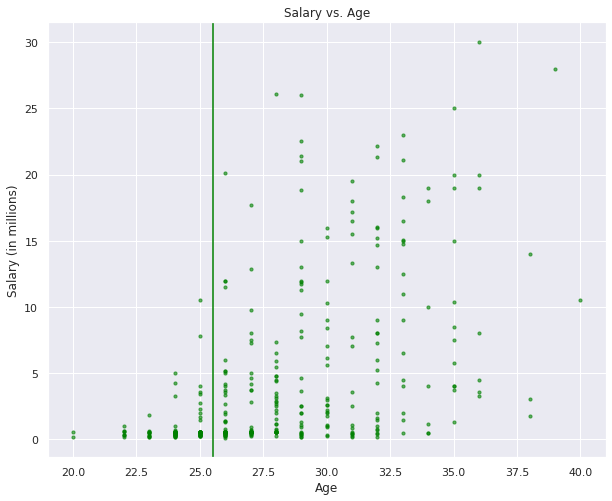

In [1227]:
#Plot of salary vs. age with line at dividing line for rookie contracts of age 25
#to the right of the line, we have players not on their rookie contracts while
#to the left of the line we have players likely still on rookie contracts.

x= stats['age']
y = stats['salary']
plt_3 = plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10, alpha = 0.6, color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')
plt.axvline(x=25.5, color = 'green')

Text(0.5, 1.0, 'Salary vs. Rookie contract')

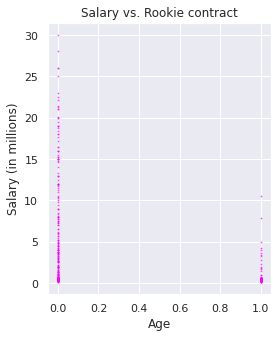

In [1228]:
x= stats['Rookie contract']
y = stats['salary']
plt_2 = plt.figure(figsize=(4,5))
plt.scatter(x,y,s=.6, alpha = 0.6, color = 'magenta')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Rookie contract')

Text(0.5, 0, 'Non-Rookie Contract Salary Distribution (millions)')

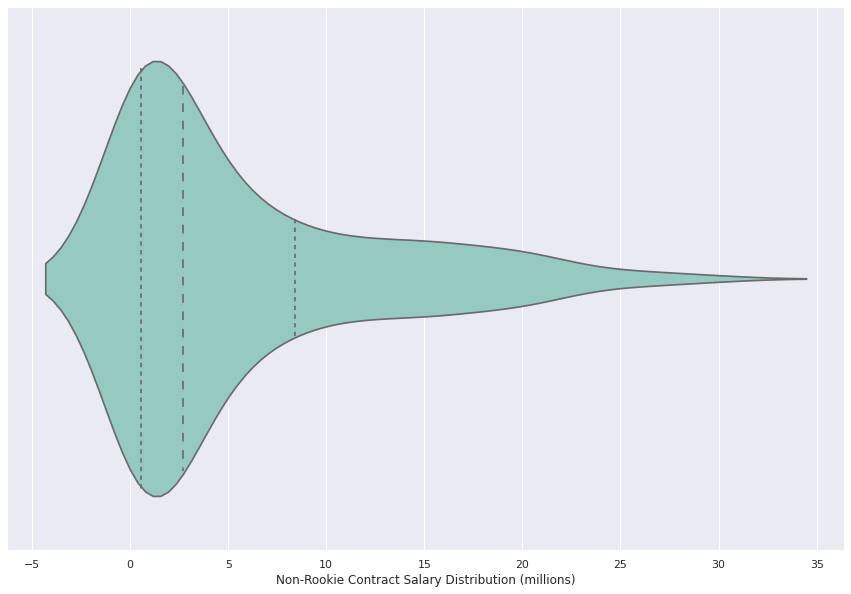

In [1229]:
#visualize distribution of non-rookie contract player salaries vs. rookie contract player salaries.
#note that the distribution for non-rookis is much wider
non_rookies = stats.loc[stats['Rookie contract'] == 0]
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 10)})
ax = sns.violinplot(x = non_rookies['salary'], palette = 'Set3',inner = 'quartile', linewidth = 1.7)
ax.set_xlabel('Non-Rookie Contract Salary Distribution (millions)')

Text(0.5, 0, 'Rookie Contract Salary Distribution (millions)')

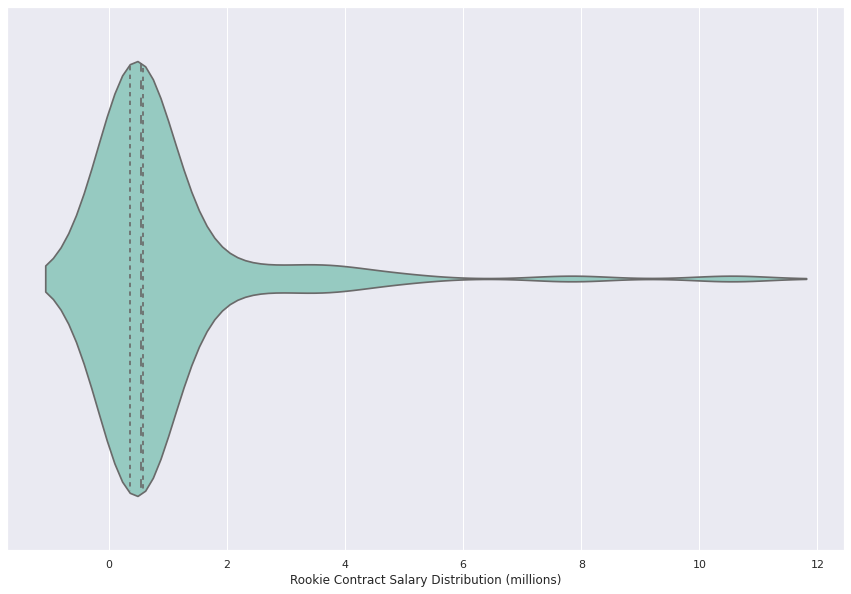

In [1230]:
import seaborn as sns
#visualize distribution of rookie contract player salaries vs. rookie contract player salaries
rookies = stats.loc[stats['Rookie contract'] == 1]
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 10)})
ax = sns.violinplot(x = rookies['salary'], palette = 'Set3',inner = 'quartile', linewidth = 1.7)
ax.set_xlabel('Rookie Contract Salary Distribution (millions)')

In [1231]:
print(stats.columns)

Index(['name', 'bats', 'throws', 'age', 'year', 'stints', 'teamID', 'lg', 'G',
       'tap', 'AB', 'R', 'H', 'db', 'tr', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'hbp', 'SH', 'SF', 'GIDP', 'avg', 'obp', 'slg', 'woba', 'PRO',
       'GURU', 'pos1', 'salary', 'multiple_positions', 'ops', 'WAR', 'count',
       'Rookie contract'],
      dtype='object')


# Now, we will drop irrelevant columns and one hot encode the important categorical features such as bats, throws, and position 1

In [1232]:
#one hot encode each of the categorical variables
dummy_position = pd.get_dummies(stats['pos1'])
dummy_throws = pd.get_dummies(stats['bats'], prefix = 'bats')
dummy_bats = pd.get_dummies(stats['throws'], prefix = 'throws')

In [1233]:
#Add the new one hot encoded portions to the original dataframe
dummies = [dummy_position, dummy_throws, dummy_bats]
#Add the one hot coded dataframes for position, throwing hand, and batting stance into the original stats dataframe
for item in dummies:
  stats = pd.merge(left = stats, right = item, left_index = True, right_index = True)
#Drop the old columns holding bats and throws since we have this info in one hot encoded format already in the dataframe
stats.drop(columns = ['bats','throws','pos1', 'name', 'year', 'lg', 'teamID', 'count'], axis = 1, inplace = True)
stats.reindex()
stats.head()

,age,stints,G,tap,AB,R,H,db,tr,HR,...,C,DH,OF,P,SS,bats_B,bats_L,bats_R,throws_L,throws_R
0,32,1,159.0,693.0,634.0,85.0,180.0,38.0,1.0,33.0,...,0,0,0,0,0,0,0,1,0,1
3,23,1,152.0,584.0,531.0,69.0,135.0,25.0,1.0,20.0,...,0,0,0,0,1,0,0,1,0,1
4,30,1,111.0,333.0,310.0,42.0,70.0,14.0,0.0,20.0,...,0,0,0,0,0,0,1,0,0,1
6,29,1,83.0,234.0,202.0,34.0,55.0,8.0,3.0,5.0,...,0,0,0,0,0,1,0,0,0,1
8,29,1,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,...,0,0,0,0,1,0,0,1,0,1


In [1234]:
stats.shape

(350, 44)

In [1235]:
#write the stats dataframe to a csv before we split the data into train and test and normalize the data
stats.to_csv('positionplayers_cleaned.csv')

In [1236]:
#In the next two chunks we analyze correlations between the various features in the stats dataset.
#use pandas function corr() and the heatmap from seaborn.
#We want to see what features are highly correlated to the salary of a player
stats_numeric = stats.apply(pd.to_numeric)
stats_numeric.corr()

,age,stints,G,tap,AB,R,H,db,tr,HR,...,C,DH,OF,P,SS,bats_B,bats_L,bats_R,throws_L,throws_R
age,1.000000,0.113920,0.044449,0.007569,0.002295,-0.040306,-0.017855,-0.039396,-0.172340,-0.036857,...,0.105873,0.095011,-0.125794,-0.074525,-0.159407,-0.017701,-0.014481,0.024964,-0.005052,0.017636
stints,0.113920,1.000000,0.021977,-0.026864,-0.019695,-0.027635,-0.044779,-0.007101,-0.066296,-0.016423,...,-0.025313,-0.023455,0.088807,-0.010429,-0.022791,0.006561,-0.000749,-0.003515,0.049430,-0.047102
G,0.044449,0.021977,1.000000,0.944852,0.943157,0.857623,0.892222,0.818759,0.470018,0.694507,...,-0.303354,-0.093128,0.093072,NaN,0.068107,0.041343,0.039307,-0.063454,0.094974,-0.094974
tap,0.007569,-0.026864,0.944852,1.000000,0.995843,0.940853,0.967641,0.891832,0.513066,0.783272,...,-0.291151,-0.046838,0.058657,NaN,0.122086,0.048248,0.023622,-0.053205,0.072525,-0.072525
AB,0.002295,-0.019695,0.943157,0.995843,1.000000,0.926402,0.974688,0.895808,0.525289,0.759407,...,-0.293532,-0.045517,0.059361,NaN,0.141074,0.050580,0.009860,-0.041812,0.065840,-0.065840
R,-0.040306,-0.027635,0.857623,0.940853,0.926402,1.000000,0.935498,0.894134,0.513053,0.847379,...,-0.321737,-0.020894,0.103464,NaN,0.115065,0.030629,0.036763,-0.054170,0.100339,-0.100339
H,-0.017855,-0.044779,0.892222,0.967641,0.974688,0.935498,1.000000,0.919354,0.548789,0.748224,...,-0.302673,-0.018431,0.052515,NaN,0.159363,0.061667,-0.005809,-0.034272,0.060521,-0.060521
db,-0.039396,-0.007101,0.818759,0.891832,0.895808,0.894134,0.919354,1.000000,0.493387,0.697641,...,-0.310207,-0.011345,0.077071,NaN,0.162218,0.056522,0.033295,-0.067597,0.092509,-0.092509
tr,-0.172340,-0.066296,0.470018,0.513066,0.525289,0.513053,0.548789,0.493387,1.000000,0.264359,...,-0.289047,-0.016732,0.175991,NaN,0.111709,0.130844,0.047506,-0.128776,0.089220,-0.089220
HR,-0.036857,-0.016423,0.694507,0.783272,0.759407,0.847379,0.748224,0.697641,0.264359,1.000000,...,-0.203108,0.029591,0.034710,NaN,0.002928,-0.032254,0.028484,-0.005915,0.070001,-0.070001


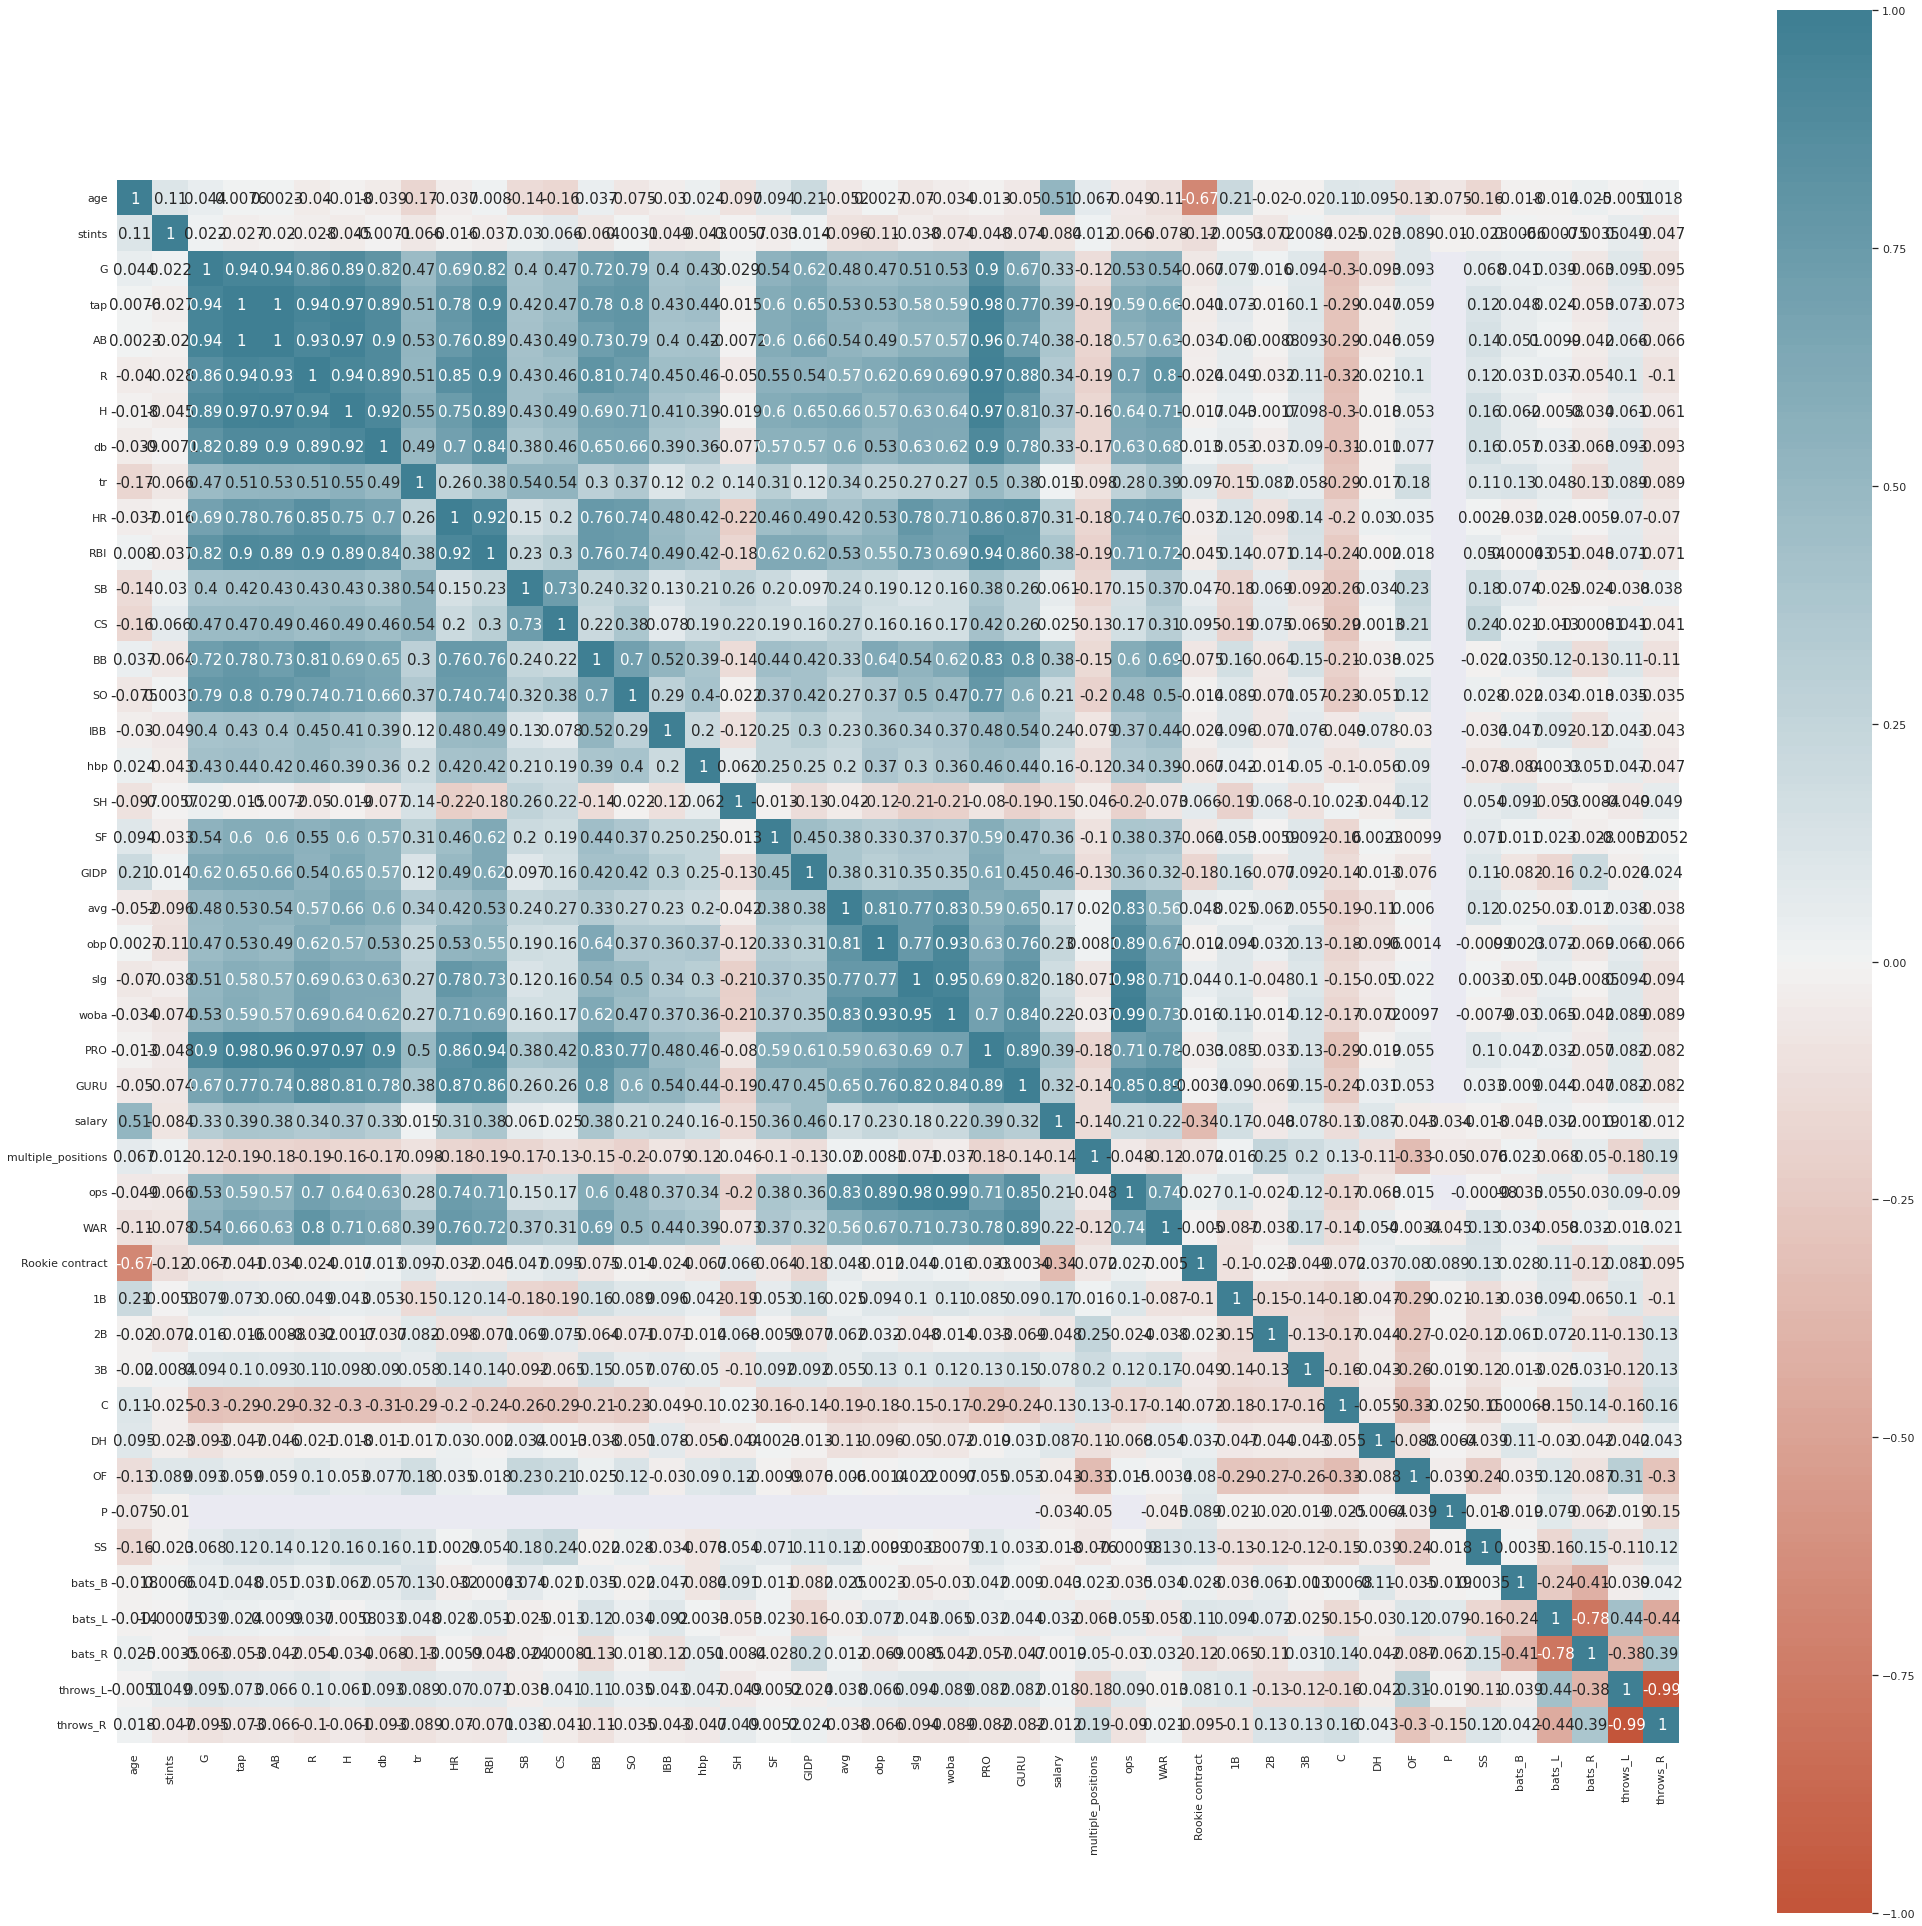

In [1237]:
#Use seaborn's heatmap to investigate relationships between the variables
plt.subplots(figsize = (35,35))
sns.heatmap(stats_numeric.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )

In [1238]:
#Normalize the stats dataset before splitting and write this to a csv
# (we will use this for visualization purporses before performing machine learning)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_full_normalized = scaler.fit_transform(stats)

In [1239]:
print(stats_full_normalized)

[[0.6        0.         0.98064516 ... 1.         0.         1.        ]
 [0.15       0.         0.93548387 ... 1.         0.         1.        ]
 [0.5        0.         0.67096774 ... 0.         0.         1.        ]
 ...
 [0.7        0.         0.29032258 ... 1.         0.         1.        ]
 [0.9        0.         0.25806452 ... 0.         0.         1.        ]
 [0.4        0.         0.53548387 ... 1.         0.         1.        ]]


In [1240]:
#convert the normalized numpy array to a pandas dataframe then write it to a .csv
pd.DataFrame(stats_full_normalized).to_csv('ppdata_full_normalized.csv')

Split the position players dataset we have cleaned into train and test sets. After splitting each we will perform min-max normalization.

In [1241]:
import sklearn
from sklearn.model_selection import train_test_split

Utilize an 80-20 train test split on our dataset



In [1242]:
stats_train, stats_test = train_test_split(stats, test_size = 0.2, random_state = 5)

In [1243]:
print('Train:')
print('Train dataset dimensions: ', stats_train.shape, '\n')

print('Test:')
print('Test dataset dimensions: ', stats_test.shape, '\n')

Train:
Train dataset dimensions:  (280, 44) 

Test:
Test dataset dimensions:  (70, 44) 



Now, that we have split the train and test datasets, we can save these each to csv files and we will normalize each independently when we go to build our regression models later

Normalize the training data using min max normalization

In [1244]:
stats_train.to_csv('pp_traindata.csv')
stats_train_normalized = scaler.fit_transform(stats_train)

In [1245]:
#print to double check that this worked
print(stats_train_normalized)

[[0.35       0.         0.92903226 ... 1.         0.         1.        ]
 [0.35       0.         0.75483871 ... 1.         0.         1.        ]
 [0.65       0.         0.83870968 ... 1.         0.         1.        ]
 ...
 [0.45       0.5        0.90322581 ... 0.         0.         1.        ]
 [0.6        1.         0.63225806 ... 1.         0.         1.        ]
 [0.2        0.         0.86451613 ... 0.         0.         1.        ]]


In [1246]:
pd.DataFrame(stats_train_normalized).to_csv('pp_traindata_normalized.csv')

Normalize the test data using min max normalization

In [1247]:
stats_test.to_csv('pp_testdata.csv')
stats_test_normalized = scaler.fit_transform(stats_test)

In [1248]:
#print to double check that this worked
print(stats_test_normalized)

[[0.625      0.         0.4        ... 1.         0.         1.        ]
 [0.5625     0.         0.99333333 ... 1.         0.         1.        ]
 [0.1875     0.         0.42       ... 1.         0.         1.        ]
 ...
 [0.         0.         0.98666667 ... 0.         0.         1.        ]
 [0.625      0.5        0.71333333 ... 0.         1.         0.        ]
 [0.375      0.         0.38       ... 1.         0.         1.        ]]


In [1249]:
pd.DataFrame(stats_test_normalized).to_csv('pp_testdata_normalized.csv')